In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_classif,f_regression,mutual_info_regression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor


In [38]:
#1) load the given dataset
filename=r"C:\Users\k.park99\Downloads\Fingertips Data Science Pro\Python\Machine Leaning\Final Project\Python_Case_Study_2.csv"
df=pd.read_csv(filename)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [39]:
#2) print all the column names
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [40]:
#3) describe the data
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [41]:
#4) find all the Null values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Text(0.5, 0, 'Internation Plans')

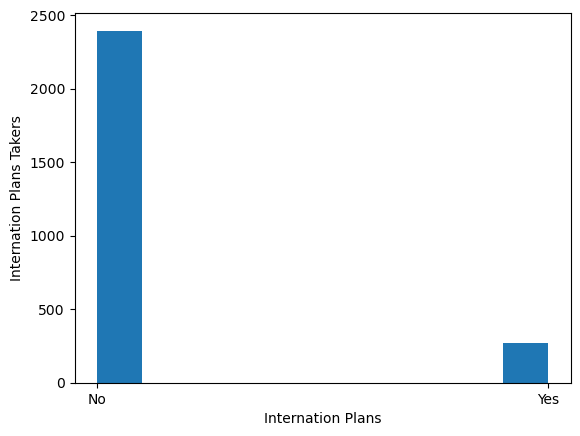

In [42]:
#5) plot the customers who have international plans
plt.hist(df['International plan'])
plt.ylabel('Internation Plans Takers')
plt.xlabel('Internation Plans')

Text(0.5, 0, 'Voice mail plan')

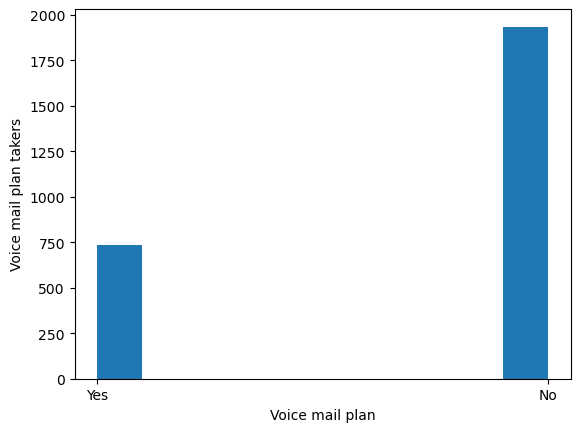

In [43]:
#6) plot the customers who have Voice mail plan
plt.hist(df['Voice mail plan'])
plt.ylabel('Voice mail plan takers')
plt.xlabel('Voice mail plan')

Text(0.5, 0, 'Total day calls')

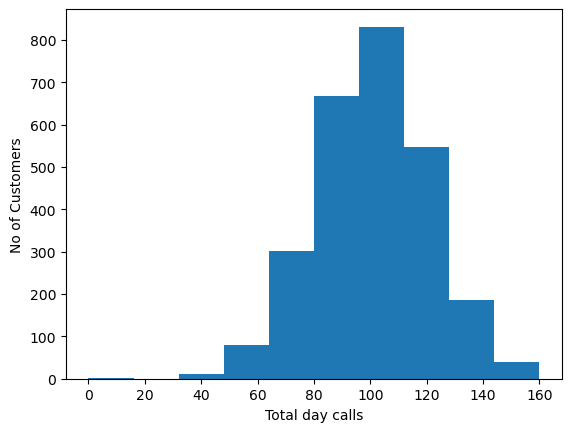

In [44]:
#7) Plot the total day calls
plt.hist(df['Total day calls'])
plt.ylabel('No of Customers')
plt.xlabel('Total day calls')

Text(0.5, 0, 'Total day charge')

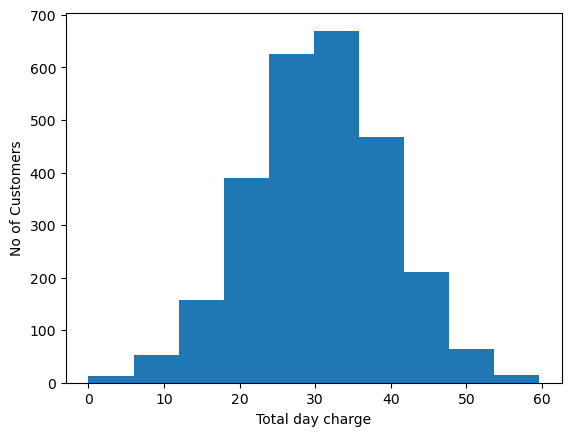

In [45]:
#8) Plot the total day charge
plt.hist(df['Total day charge'])
plt.ylabel('No of Customers')
plt.xlabel('Total day charge')

([<matplotlib.patches.Wedge at 0x2d22b981fa0>,
 [Text(-0.987013487405142, 0.4855969271734941, 'False'),
  Text(0.9870135101375737, -0.4855968809680577, 'True')])

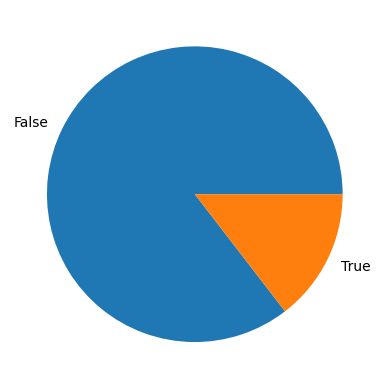

In [46]:
#9) Display pie chart for value count in Churn column
list_churn=[]
list_churn.append(len(df[df['Churn']==False]))
list_churn.append(len(df[df['Churn']==True]))
arr_churn=np.array(list_churn)
plt.pie(arr_churn,labels=['False','True'])

Text(0, 0.5, 'Total Day Charge')

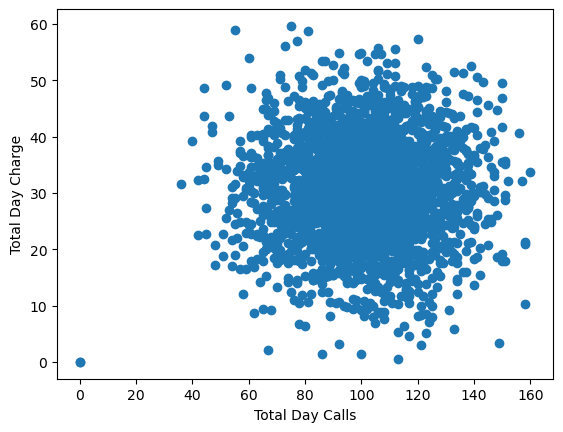

In [47]:
#10 Display a scatter plot between total day calls and total day charges
plt.scatter(df['Total day calls'],df['Total day charge'])
plt.xlabel('Total Day Calls')
plt.ylabel('Total Day Charge')

Text(0, 0.5, 'Total Night Calls')

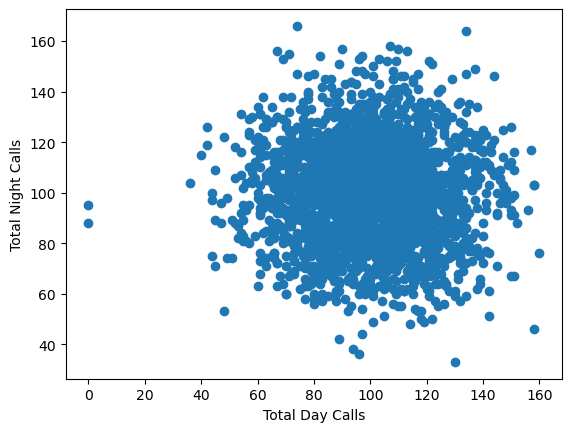

In [48]:
#11) Display a scatter plot between total day calls and total night calls
plt.scatter(df['Total day calls'],df['Total night calls'])
plt.xlabel('Total Day Calls')
plt.ylabel('Total Night Calls')

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

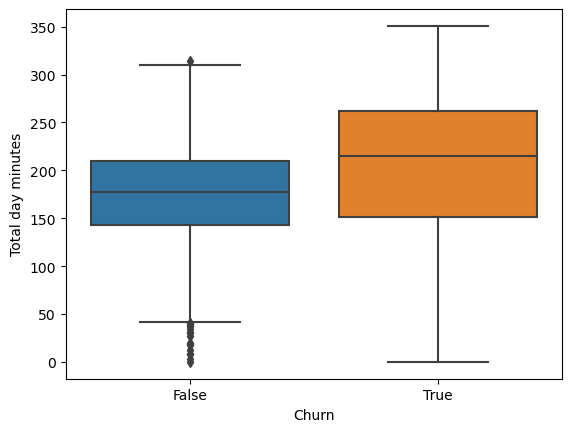

In [49]:
#12 Display a boxplot of Total day minutes with respect to Churn
import seaborn as sns
sns.boxplot(x=df.Churn,y=df['Total day minutes'])

<AxesSubplot:xlabel='Churn', ylabel='Total day charge'>

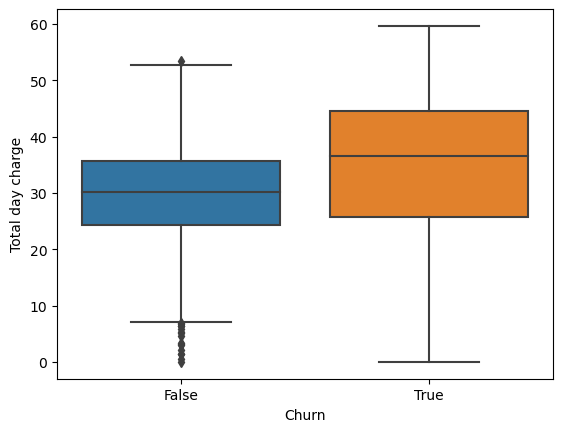

In [50]:
#13) Display a boxplot of Total day charge with respect to Churn
import seaborn as sns
sns.boxplot(x=df.Churn,y=df['Total day charge'])

In [51]:
#Part2 
#1 Perform encoding on churn
df.Churn=df.Churn.replace([True,False],[1,0])
df


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [52]:
#2 Perform encoding on International Plan
df['International plan'].replace(['Yes','No'],[1,0],inplace=True)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,415,0,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,415,0,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,510,0,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [53]:
#3 Perform encoding on voice mail plan using sklearn
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
df['Voice mail plan']=lenc.fit_transform(df['Voice mail plan'])
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [54]:
#4 Check the correlation among all the columns
corrmat=df.corr()
churn_corr=corrmat[['Churn']]
x1=churn_corr[churn_corr[['Churn']]>0.05 ]
x2=churn_corr[churn_corr[['Churn']]<-0.05 ]
print(churn_corr.sort_values(['Churn']))
features=[]
features.extend(x1[x1.Churn.notnull()].index)
features.extend(x2[x1.Churn.notnull()].index)
print(features)
print(len(features))

                           Churn
Voice mail plan        -0.099291
Number vmail messages  -0.086474
Total intl calls       -0.069882
Total eve calls        -0.001539
Area code               0.001019
Total night calls       0.012262
Account length          0.017728
Total day calls         0.018290
Total night charge      0.033635
Total night minutes     0.033639
Total eve charge        0.072893
Total eve minutes       0.072906
Total intl minutes      0.086204
Total intl charge       0.086216
Total day minutes       0.195688
Total day charge        0.195689
Customer service calls  0.202590
International plan      0.277489
Churn                   1.000000
['International plan', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total intl minutes', 'Total intl charge', 'Customer service calls', 'Churn', 'International plan', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total intl minutes', 'Total intl charge', 'Customer 

In [55]:
#Extra1: KBest
df1=df.copy()
df_y=df1['Churn']
df1.drop(['Churn'],axis=1,inplace=True)
df_x=df1
df_x

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [56]:
df1.drop(['State'],axis=1,inplace=True)
from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_classif
model1=SelectKBest(score_func=chi2,k=10)
fit=model1.fit(df_x,df_y)
df_scores=fit.scores_
feature_columns=df_x.columns
df_scores
feature_df=pd.DataFrame(df_scores,index=feature_columns)
feature_df=feature_df.sort_values([0],ascending=False)
f1=feature_df.index
f1=f1[0:18]
print(f1)
print('')
print('Overlapped Features are: ')
f1_1=[]
for i in range(len(f1)):
    for j in range(len(features)):
        if f1[i]==features[j]:
                f1_1.append(f1[i])
print(f1_1)
print(len(f1_1))

Index(['Total day minutes', 'Number vmail messages', 'Total day charge',
       'International plan', 'Total eve minutes', 'Customer service calls',
       'Total night minutes', 'Voice mail plan', 'Total intl calls',
       'Total eve charge', 'Total intl minutes', 'Account length',
       'Total intl charge', 'Total day calls', 'Total night charge',
       'Total night calls', 'Total eve calls', 'Area code'],
      dtype='object')

Overlapped Features are: 
['Total day minutes', 'Total day minutes', 'Total day charge', 'Total day charge', 'International plan', 'International plan', 'Total eve minutes', 'Total eve minutes', 'Customer service calls', 'Customer service calls', 'Total eve charge', 'Total eve charge', 'Total intl minutes', 'Total intl minutes', 'Total intl charge', 'Total intl charge']
16


In [57]:
#5 Create features and target data. Only select features data that are highly correlated with target data.
X=df[f1_1]
Y=df[['Churn']]

In [58]:
#6
from sklearn.preprocessing import StandardScaler
#model2=StandardScaler()
#Y[['Churn']]=model2.fit_transform(Y[['Churn']])
model3=StandardScaler()
X[f1_1]=model3.fit_transform(X[f1_1])


In [59]:
#7 Check the shape of both training data and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2132, 16)
(534, 16)
(2132, 1)
(534, 1)


In [60]:
Y_train['Churn'].unique()

array([0, 1], dtype=int64)

In [61]:
#8 Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
model4=LogisticRegression()
model4.fit(X_train,Y_train)
Y_pred4=model4.predict(X_test)
def score_report(X_train,X_test,Y_train,Y_test,Y_pred):
    from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report,confusion_matrix,f1_score
    ps=precision_score(Y_test,Y_pred)
    print("Precision score is: "+str(ps))
    rs=recall_score(Y_test,Y_pred)
    print("Recall score is: "+str(rs))
    ac=accuracy_score(Y_test,Y_pred)
    print("Accuracy score is: "+str(ac))
    f1=f1_score(Y_test,Y_pred)
    print("F1 score is: "+str(f1))
    print('')
    print("Classification report: ")
    print(classification_report(Y_test,Y_pred))
    print("")
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test,Y_pred))
score_report(X_train,X_test,Y_train,Y_test,Y_pred4)

Precision score is: 0.36666666666666664
Recall score is: 0.14666666666666667
Accuracy score is: 0.8445692883895131
F1 score is: 0.2095238095238095

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       459
           1       0.37      0.15      0.21        75

    accuracy                           0.84       534
   macro avg       0.62      0.55      0.56       534
weighted avg       0.80      0.84      0.81       534


Confusion Matrix:
[[440  19]
 [ 64  11]]


In [62]:
#9) Display confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred4)

array([[440,  19],
       [ 64,  11]], dtype=int64)

In [63]:
#10) Perform Hyper parameter tuning
#Auto Logistic Regression Classifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
def Logistic_Model(X_train,X_test,Y_train,Y_test):
    score1=[0]
    score2=[0]
    score3=[0]
    max_iter1=0
    max_iter2=0
    max_iter3=0
    
    for i in range(1,1000,5):
        model1=LogisticRegression(solver='lbfgs',max_iter=i)
        model1.fit(X_train,Y_train)
        m=model1.score(X_test,Y_test)
        if m>score1[0]:
            score1=[]
            score1.append(model1.score(X_test,Y_test))
            max_iter1=i
    print("Score of Logistic Regression is "+str(score1[0])+" where solver is 'lbfgs' and max_iterations is  "+str(max_iter1))
    for i in range(1,1000,5):
        model2=LogisticRegression(solver='newton-cg',max_iter=i)
        model2.fit(X_train,Y_train)
        m=model2.score(X_test,Y_test)
        
        if m>score2[0]:
            score2=[]
            score2.append(model2.score(X_test,Y_test))
            max_iter2=i
    print("Score of Logistic Regression is "+str(score2[0])+" where solver is 'newton-cg' and max_iterations is  "+str(max_iter2)) 
    for i in range(1,1000,5):
        model3=LogisticRegression(solver='saga',max_iter=i)
        model3.fit(X_train,Y_train)
        m=model3.score(X_test,Y_test)
        
        if m>score3[0]:
            score3=[]
            score3.append(model3.score(X_test,Y_test))
            max_iter3=i
    print("Score of Logistic Regression is "+str(score3[0])+" where solver is 'saga' and max_iterations is  "+str(max_iter3))
Logistic_Model(X_train,X_test,Y_train,Y_test)

Score of Logistic Regression is 0.846441947565543 where solver is 'lbfgs' and max_iterations is  6
Score of Logistic Regression is 0.8445692883895131 where solver is 'newton-cg' and max_iterations is  6
Score of Logistic Regression is 0.8445692883895131 where solver is 'saga' and max_iterations is  11


In [64]:
#11) Create a model
model5=LogisticRegression(max_iter=6)
model5.fit(X_train,Y_train)
Y_pred5=model5.predict(X_test)


In [65]:
#12) Check the model score of both training and testing data
print('Training Score is:')
print(model5.score(X_train,Y_train))
print('')
print("Testing Score is:")
print(model5.score(X_test,Y_test))

Training Score is:
0.8625703564727955

Testing Score is:
0.846441947565543


In [66]:
score_report(X_train,X_test,Y_train,Y_test,Y_pred5)

Precision score is: 0.3870967741935484
Recall score is: 0.16
Accuracy score is: 0.846441947565543
F1 score is: 0.22641509433962265

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       459
           1       0.39      0.16      0.23        75

    accuracy                           0.85       534
   macro avg       0.63      0.56      0.57       534
weighted avg       0.81      0.85      0.82       534


Confusion Matrix:
[[440  19]
 [ 63  12]]


In [67]:
#13) Perform cross validation technique with SVM Classifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC as svc
model6=KFold(n_splits=10)
model7=svc()
model7.fit(X_train,Y_train)
cv_result=cross_val_score(model7,X_train,Y_train,cv=model6)
cv_result

array([0.86915888, 0.89719626, 0.92018779, 0.90140845, 0.9342723 ,
       0.88262911, 0.88262911, 0.88262911, 0.91079812, 0.91079812])

In [68]:
#14) Perform hyperparameter tuning with different classifier models
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
model9=svc()
random_grid={'C':np.arange(1,101,2),'kernel':['linear','poly','rbf','sigmoid']}


rf_random = RandomizedSearchCV(estimator = model9, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 2,
                               verbose=2,
                               random_state=42, n_jobs = 1)
rf_random.fit(X_train,Y_train)
rf_random.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ...............................C=47, kernel=sigmoid; total time=   0.0s
[CV] END ...............................C=47, kernel=sigmoid; total time=   0.0s
[CV] END ................................C=7, kernel=sigmoid; total time=   0.0s
[CV] END ................................C=7, kernel=sigmoid; total time=   0.0s
[CV] END ...................................C=15, kernel=rbf; total time=   0.0s
[CV] END ...................................C=15, kernel=rbf; total time=   0.0s
[CV] END ...................................C=79, kernel=rbf; total time=   0.0s
[CV] END ...................................C=79, kernel=rbf; total time=   0.0s
[CV] END ................................C=65, kernel=linear; total time=  37.3s
[CV] END ................................C=65, kernel=linear; total time=  59.9s
[CV] END ...............................C=57, kernel=sigmoid; total time=   0.0s
[CV] END ...............................C=57, ke

{'kernel': 'rbf', 'C': 79}

In [69]:
model10=svc(kernel='rbf',C=79)
model10.fit(X_train,Y_train)
Y_pred10=model10.predict(X_test)
score_report(X_train,X_test,Y_train,Y_test,Y_pred10)

Precision score is: 0.5846153846153846
Recall score is: 0.5066666666666667
Accuracy score is: 0.8801498127340824
F1 score is: 0.5428571428571428

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       459
           1       0.58      0.51      0.54        75

    accuracy                           0.88       534
   macro avg       0.75      0.72      0.74       534
weighted avg       0.87      0.88      0.88       534


Confusion Matrix:
[[432  27]
 [ 37  38]]


In [70]:
#15) Perform k-means clustering on dataset and divide it into four clusters
X_cluster=X.copy()
from sklearn.cluster import KMeans
model11=KMeans(n_clusters=4)
model11.fit(X_cluster)
Y_pred11=model11.fit_predict(X_cluster)
from sklearn.metrics import silhouette_score
sil=silhouette_score(X_cluster,Y_pred)
print("Silhouette Score is: " +str(sil))
X_cluster['cluster']=Y_pred


Silhouette Score is: 0.1802133362156861


In [71]:
#1 SVC with PCA
#16) Apply PCA give n components value to 3 show we only get 3 columns after applying PCA
from sklearn.decomposition import PCA
model12=PCA(n_components=2)
X_train12=model12.fit_transform(X_train)
X_test12=model12.transform(X_test)
model13=svc(kernel='poly',C=23)
model13.fit(X_train12,Y_train)
Y_pred13=model13.predict(X_test12)
score_report(X_train12,X_test12,Y_train,Y_test,Y_pred13)

Precision score is: 1.0
Recall score is: 0.02666666666666667
Accuracy score is: 0.8632958801498127
F1 score is: 0.05194805194805195

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       459
           1       1.00      0.03      0.05        75

    accuracy                           0.86       534
   macro avg       0.93      0.51      0.49       534
weighted avg       0.88      0.86      0.80       534


Confusion Matrix:
[[459   0]
 [ 73   2]]


In [72]:
#2 Logistic Regression with PCA
#16) Apply PCA give n components value to 3 show we only get 3 columns after applying PCA
from sklearn.decomposition import PCA
model14=PCA(n_components=2)
X_train14=model14.fit_transform(X_train)
X_test14=model14.transform(X_test)
model15=LogisticRegression(max_iter=8)
model15.fit(X_train14,Y_train)
Y_pred15=model15.predict(X_test14)
score_report(X_train14,X_test14,Y_train,Y_test,Y_pred13)

Precision score is: 1.0
Recall score is: 0.02666666666666667
Accuracy score is: 0.8632958801498127
F1 score is: 0.05194805194805195

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       459
           1       1.00      0.03      0.05        75

    accuracy                           0.86       534
   macro avg       0.93      0.51      0.49       534
weighted avg       0.88      0.86      0.80       534


Confusion Matrix:
[[459   0]
 [ 73   2]]
